In [446]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [447]:
# matplotlib.rcParams.update({'font.size': 14})

In [448]:
TRAIN_DATASET_PATH = 'D:/Учеба/NUMPY/train.csv'
TEST_DATASET_PATH = 'D:/Учеба/NUMPY/test.csv'

In [449]:
train_df = pd.read_csv(TRAIN_DATASET_PATH, sep=',')

In [452]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

In [453]:
cat_colnames = train_df.select_dtypes(include='object').columns.tolist()
cat_colnames

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [454]:
def ColumnsWithNaN (DF):
    asd = [DF.isna().sum().index[num_col] for num_col in range(len(DF.isna().sum())) if DF.isna().sum()[num_col] > 0]
    if len(asd) == 0:
        return 'NAN is unknowns'
    return asd
col_nan = ColumnsWithNaN(train_df)

In [455]:
# Важно
train_df_median_nan = train_df[asd].median()
train_df[asd] = train_df[asd].fillna(train_df_median_nan)

In [456]:
asd = [train_df.isna().sum().index[num_col] for num_col in range(len(train_df.isna().sum())) if train_df.isna().sum()[num_col] > 0]
asd

[]

In [458]:
train_df_median_nan = train_df[asd].median()
train_df_median_nan

Series([], dtype: float64)

In [459]:
# train_df[asd] = train_df[col_nan].fillna(train_df_median_nan)
ColumnsWithNaN(train_df)

'NAN is unknowns'

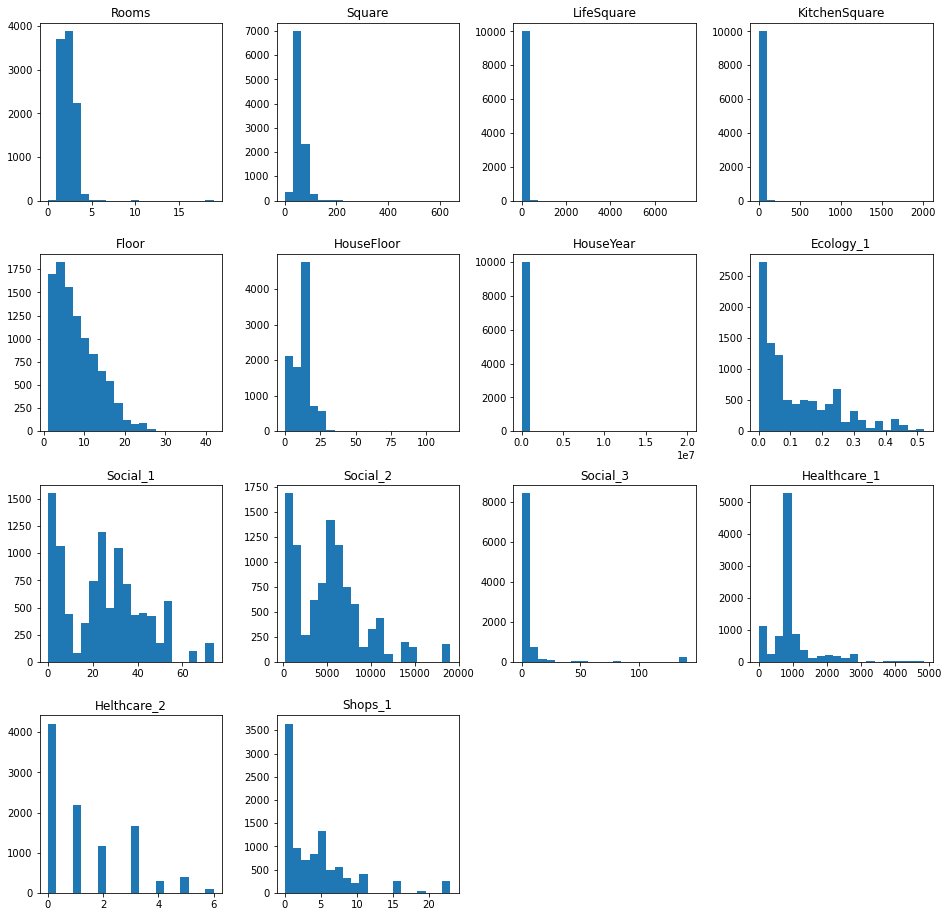

In [460]:
df_num_features = train_df.select_dtypes(include=['float64', 'int64'])
df_num_features.drop('Price', axis=1, inplace=True)
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

In [154]:
train_df_not_obj = pd.DataFrame(train_df[df_num_features.columns.to_list()].dtypes)
train_df_not_obj

,0
Rooms,float64
Square,float64
LifeSquare,float64
KitchenSquare,float64
Floor,int64
HouseFloor,float64
HouseYear,int64
Ecology_1,float64
Social_1,int64
Social_2,int64


In [223]:
# Нужно ли
df2 = train_df.copy()

In [249]:
a = 'Healthcare_1' # Нужно - Переделать в функцию
df2[a].describe()

count    5202.000000
mean     1142.904460
std      1021.517264
min         0.000000
25%       350.000000
50%       900.000000
75%      1548.000000
max      4849.000000
Name: Healthcare_1, dtype: float64

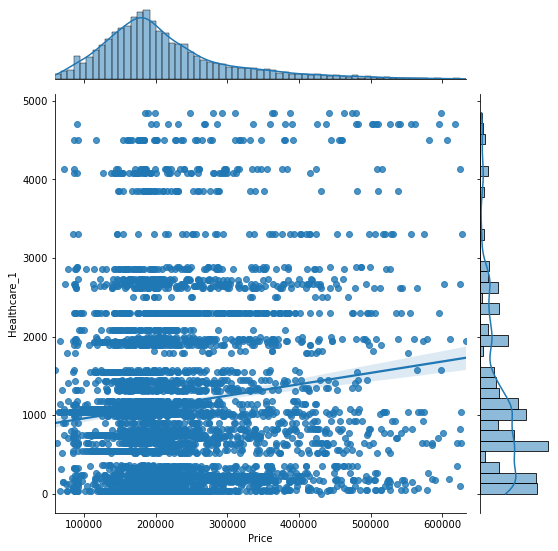

In [250]:
grid = sns.jointplot(df2['Price'], df2[a], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

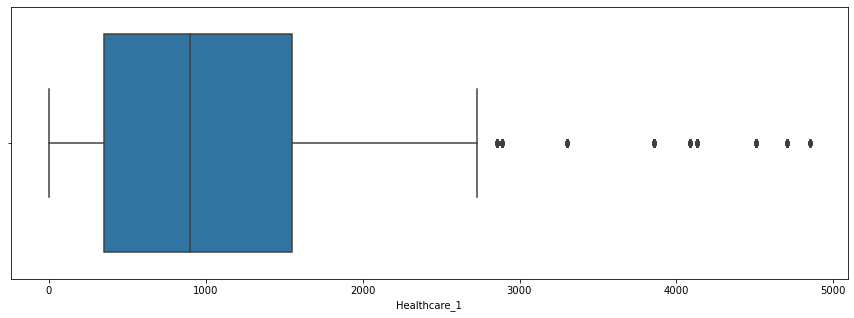

In [251]:
plt.figure(figsize=(15, 5))

sns.boxplot(df2[a], whis=1)

plt.xlabel(a)
plt.show()

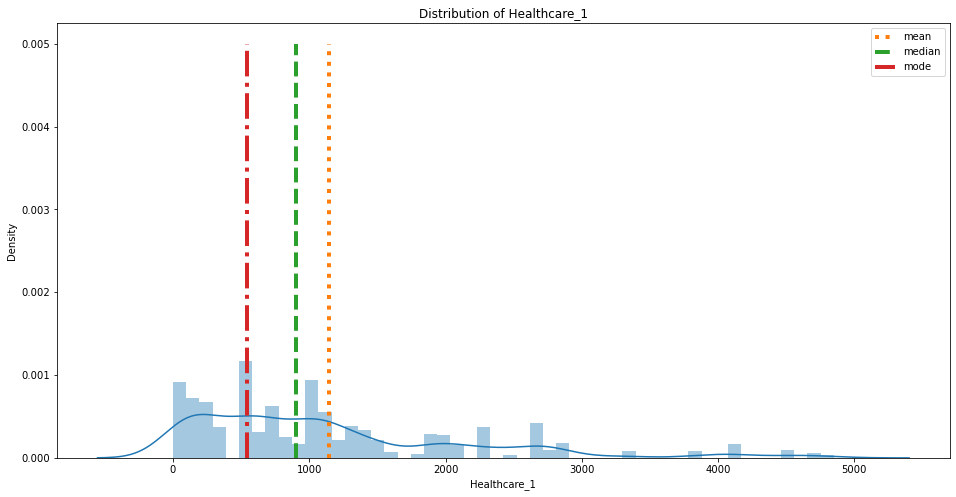

In [252]:
target_mean = round(df2[a].mean(), 2)
target_median = df2[a].median()
target_mode = df2[a].mode()[0]

plt.figure(figsize = (16, 8))

sns.distplot(df2[a], bins=50)
j = 0.005

y = np.linspace(0, j, 10)
plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 10, y, label='mode', linestyle='-.', linewidth=4)

plt.title(f'Distribution of {a}')
plt.legend()
plt.show()

In [253]:
target_mean, target_median, target_mode

(1142.9, 900.0, 540.0)

In [254]:
# Под вопросом
def QuantileCount(count, value):
    quant_max = np.quantile(value, q=1-count)
    quant_min = np.quantile(value, q=count)
    return quant_min, quant_max

In [255]:
QuantileCount(0.01, df2[a])

(nan, nan)

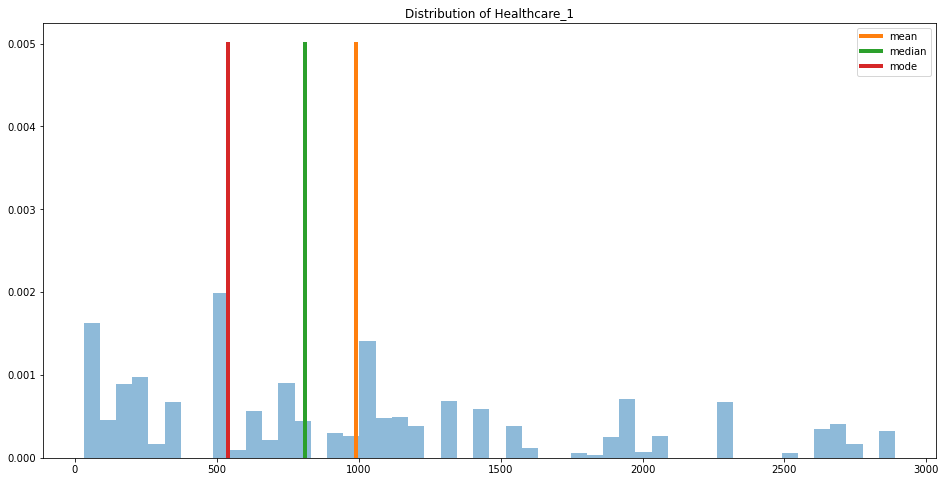

In [256]:
# df1 = df2[(df2[a] > QuantileCount(0.025, df2[a])[0]) & (df2[a] < QuantileCount(0.025, df2[a])[1])]
h_min, h_max = 25, 3000 # Вторичное
df1 = df2[(df2[a] > h_min) & (df2[a] < h_max)] # Вторичное
# df1 = df2[df2[a] < h_max]

target_mean = round(df1[a].mean(), 2)
target_median = df1[a].median()
target_mode = df1[a].mode()[0]

plt.figure(figsize = (16, 8))
plt.hist(df1[a], density=True, bins=50, alpha=0.5)
j1 = 0.005
y = np.linspace(0, j1, 10)
plt.plot([target_mean] * 10, y, label='mean',  linewidth=4)
plt.plot([target_median] * 10, y, label='median',  linewidth=4)
plt.plot([target_mode] * 10, y, label='mode', linewidth=4)

plt.title(f'Distribution of {a}')
plt.legend()
plt.show()

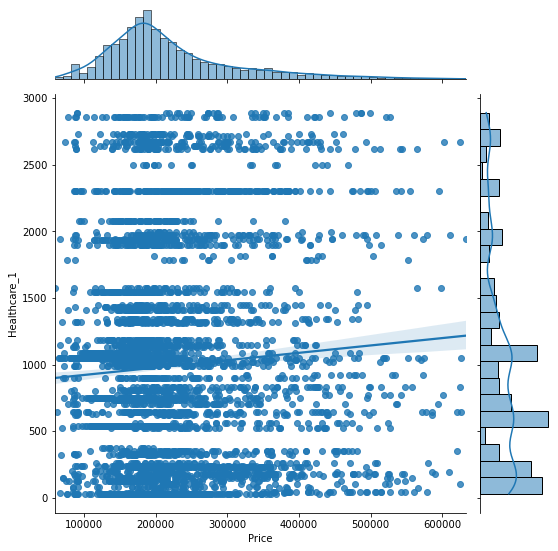

In [257]:
grid = sns.jointplot(df1['Price'], df1[a], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

In [258]:
# target_mean_s = round(df2['Price'].mean(), 2)
# target_median_s = df2['Price'].median()
# target_mode_s = df2['Price'].mode()[0]

# QuantileCount(0.01, df2['Price'])

In [259]:
# df11 = df2[(df2['Price'] > QuantileCount(0.01, df2['Price'])[0]) & (df2['Price'] < QuantileCount(0.01, df2['Price'])[1])]

In [260]:
# grid = sns.jointplot(df11['Price'], df1[a], kind='reg')
# grid.fig.set_figwidth(8)
# grid.fig.set_figheight(8)

# plt.show()

In [261]:
target_median, target_mode, target_mean

(810.0, 540.0, 990.26)

In [262]:
df1[a].describe()

count    4946.000000
mean      990.261626
std       780.548031
min        30.000000
25%       325.000000
50%       810.000000
75%      1406.000000
max      2890.000000
Name: Healthcare_1, dtype: float64

In [263]:
QuantileCount(0.025, df2[a])

(nan, nan)

In [264]:
# df2.loc[df2[a] < QuantileCount(0.025, df2[a])[0], a] = target_median
# df2.loc[df2[a] > QuantileCount(0.025, df2[a])[1], a] = target_median

In [265]:
df2.loc[df2[a] < h_min, a] = target_median
df2.loc[df2[a] > h_max, a] = target_median

In [266]:
zx = train_df.loc[train_df[a] < h_min, a]
xz = train_df.loc[train_df[a] > h_max, a]
train_df['Price'][zx.index] = train_df['Price'].median()
train_df['Price'][xz.index] = train_df['Price'].median()

In [267]:
# zx = train_df.loc[train_df[a] < QuantileCount(0.025, train_df[a])[0], a]
# xz = train_df.loc[train_df[a] > QuantileCount(0.025, train_df[a])[1], a]
# train_df['Price'][zx.index] = train_df['Price'].median()
# train_df['Price'][xz.index] = train_df['Price'].median()

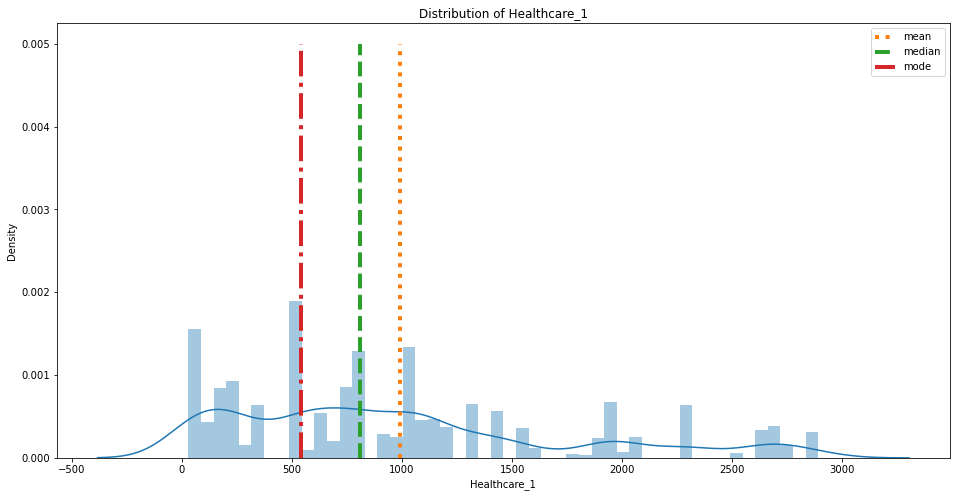

In [268]:
plt.figure(figsize = (16, 8))

sns.distplot(df2[a], bins=50)

y = np.linspace(0, j1, 5)
plt.plot([target_mean] * 5, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 5, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 5, y, label='mode', linestyle='-.', linewidth=4)

plt.title(f'Distribution of {a}')
plt.legend()
plt.show()

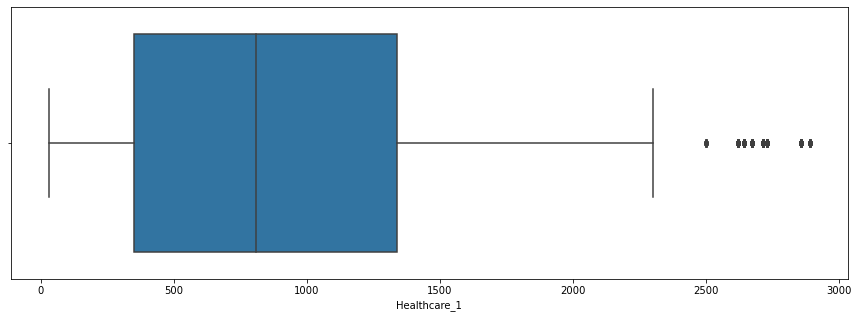

In [269]:
plt.figure(figsize=(15, 5))

sns.boxplot(df2[a], whis=1)

plt.xlabel(a)
plt.show()

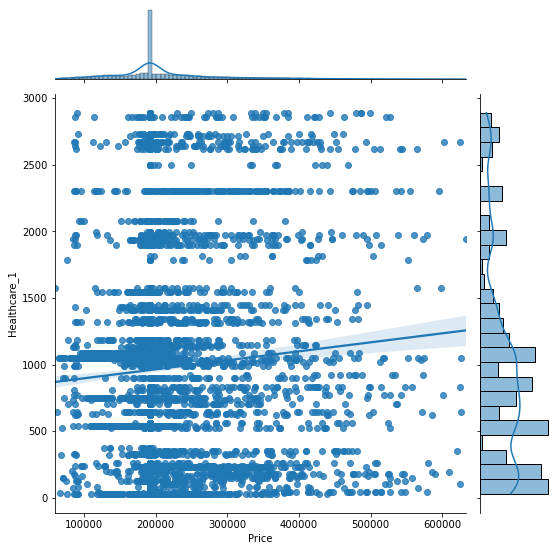

In [270]:
grid = sns.jointplot(train_df['Price'], df2[a], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

In [271]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,215796.169017
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,83927.549435
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,178822.585358
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,240420.133667
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [272]:
df2.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,41.680434,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,981.390619,1.319500,4.231300,214138.857399
std,0.839512,21.058732,11.590902,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,762.094215,1.493601,4.806341,92872.293865
min,0.000000,1.136859,25.021001,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,30.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,34.460738,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,39.442620,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,810.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,44.800064,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1340.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,100.985505,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,2890.000000,6.000000,23.000000,633233.466570


In [273]:
train_df_median_nan = df2[nan_object.index].median()
train_df_median_nan

Healthcare_1    810.00000
LifeSquare       39.44262
dtype: float64

In [274]:
df2[nan_object.index] = df2[nan_object.index].fillna(train_df_median_nan)
PreparationForReplace(df2)

,NAN,NAN_%,TypeData


In [275]:
df2.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,41.207584,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,899.157400,1.319500,4.231300,214138.857399
std,0.839512,21.058732,10.334063,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,556.264568,1.493601,4.806341,92872.293865
min,0.000000,1.136859,25.021001,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,30.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,37.824079,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,810.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,39.442620,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,810.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,41.075788,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,810.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,100.985505,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,2890.000000,6.000000,23.000000,633233.466570
